# **CAPSTONE PROJECT**: </br> CYBERBULLYING ANALYSIS, DETECTION, AND CATEGORIZATION

**PROBLEM STATEMENT** </br>
Social media usage has risen drastically in every age group; a large majority of citizens rely on this form of daily communication. Consequently, social media’s omnipresence means that cyberbullying can effectively impact anyone anytime anywhere. The anonymity of cyberbullies on the internet makes it harder to stop compared to traditional bullying. According to the UNICEF, the risk of cyberbullying increased during the pandemic due to nationwide school closures, greater usage of electronics, and less in-person interaction. The statistics of cyberbullying are very concerning: roughly 37% of middle and high school students have been cyberbullied and 87% have observed cyberbullying. To combat the rise of cyberbullying, media outlets should incorporate algorithms that detect harmful messages and predict when a user types something that can be considered online harassment.

The purpose of this project is to apply Natural Language Processing (NLP), Machine Learning (ML), and Deep Learning (DL) techniques on multiple cyberbullying datasets to perform exploratory data/text analysis, design a model that can detect cyberbullying, and utilize transfer learning with an additional model that can classify the form of cyberbullying for a comprehensive cyberbullying analysis model.

**DISCLAIMER** </br>
This capstone project uses publicly available Twitter text messages that contain no personally identifiable information. Efforts have been made to maintain ethical standards and minimize harm, including anonymization, responsible data handling, and bias analysis in modeling. This project is conducted solely for academic purposes such as understanding, flagging, and protecting against online harassment. I do not condone nor encourage any form of offensive behavior.

Note that this Notebook uses Python 3.10

In [1]:
!pip install joblib==1.5.1
!pip install alt-profanity-check==1.3.2
!pip install numpy==1.26.4
!pip install pandas==2.2.3

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


***
# **SECTION 1** : CYBERBULLYING ANALYSIS

**OVERVIEW** </br>
Cyberbullying analysis involves routine data preparation, examination, and analyis. First, the datasets will be loaded and combined into a single Pandas DataFrame where data wrangling will address any complications. Next, new features such as word count, profanity presence, and emoji count will be engineered to provide possible correlations between certain variables. Finally, various graphs and statistical information will be utilized to uncover possible trends and patterns within the DataFrame.

Import libraries for data science

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import alt-profanity-check library to assist in detecting profanity
from profanity_check import predict
# Import emoji library to assist in counting number of text emojis
from emoji import emoji_count
from sklearn.preprocessing import MinMaxScaler

Load the datasets

In [3]:
data_1 = pd.read_csv('data/cyberbullying_tweets.csv')
data_2 = pd.read_csv('data/cb_multi_labeled_balanced.csv')

## 1. **Data wrangling**

In [4]:
data_1.sample(10)

,tweet_text,cyberbullying_type
39500,Hannah Brown from the Bachelorette looks like ...,age
16681,They were always classified as Muslims you utt...,religion
22276,Hard truth? You’re a fucking IDIOT. You’re whi...,religion
45589,Hey Hey Hey ! Not me. RT @RugerRet: Im sayin t...,ethnicity
17832,This takes the cake. I cannot believe you. You...,religion
632,@OHLANDmusic I would say me but that's egotist...,not_cyberbullying
38983,I saw the kid that would bully me in middle sc...,age
15177,If you 1)use gay as an insult 2)think rape jok...,gender
45049,The story doesn’t even stop there one of the g...,ethnicity
16096,RT @joe_nuzz: Graphic of growth of Radical Isl...,religion


In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [6]:
# Handle missing and duplicate values in Dataset 1
data_1.dropna(inplace=True)
data_1.drop_duplicates(inplace=True)

data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [7]:
cyberbullying_types_count_1 = data_1['cyberbullying_type'].value_counts()
cyberbullying_types_count_1

cyberbullying_type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64

**Observations**:
- Dataset 1 consists of 47,656 unique tweets that consist of six different classes: not_cyberbullying, religion, age, gender, ethnicity
other_cyberbullying
- Each class has roughly the same number of entries which will facilitate in cyberbullying categorization

In [8]:
data_2.sample(10)

,text,label
94965,"This reaction is one word, chaotic. The voice ...",not_cyberbullying
52896,I'm saying like https://t.co/4bRFCdK8ME,not_cyberbullying
93881,@Sahid22866449 @BilalKareem Thankyou for fucki...,religion
64627,@DanaSchwartzzz There’s something hilarious ab...,not_cyberbullying
78798,brooklyne calling how to forget NYC 9/11 Attac...,not_cyberbullying
76573,RT @joysamcyborg: Nazism has revisited Europe....,religion
54152,@Nicko7200 Big W 😂😂,not_cyberbullying
89397,@PaoloGOATchero @iamlanfia @BleacherReport You...,not_cyberbullying
71689,@nooruddin1970 @HateDetectors 2) I shared my u...,religion
77146,"@optimum our service in south College Station,...",not_cyberbullying


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99990 non-null  object
 1   label   99990 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [10]:
# Handle missing and duplicate values
data_2.dropna(inplace=True)
data_2.drop_duplicates(inplace=True)

data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99989 entries, 0 to 99989
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    99989 non-null  object
 1   label   99989 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [11]:
cyberbullying_types_count_2 = data_2['label'].value_counts()
cyberbullying_types_count_2

label
not_cyberbullying    49999
ethnicity/race       17000
gender/sexual        17000
religion             15990
Name: count, dtype: int64

**Observations**:
- Dataset 2 consists of 99,989 tweets that consist of four different classes: not_cyberbullying, religion, ethnicity/race, and gender/sexual
- The dataset is designed to have an equal split of cyberbullying and non-cyberbullying values, which will facilitate in cyberbullying detection

To use both datasets, concatenation will be used. This requires renaming the following labels of Dataset 2 to be compatible with Dataset 1:
- ethnicity/race --> ethnicity
- gender/sexual --> gender </br>
as well as changing the column names to match Dataset 1:
- text --> tweet_text
- label --> cyberbullying_type

In [12]:
# Renaming columns
data_2.rename(columns={'text': 'tweet_text', 'label': 'cyberbullying_type'}, inplace=True)

def relabel(label):
    '''
    Helper function to assist in relabeling.
    '''
    if label == 'ethnicity/race':
        return 'ethnicity'
    elif label == 'gender/sexual':
        return 'gender'
    else:
        return label

data_2['cyberbullying_type'] = data_2['cyberbullying_type'].apply(relabel)

data_2

,tweet_text,cyberbullying_type
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion
...,...,...
99985,Thank fuck they didn’t dance remix Peru #LoveI...,not_cyberbullying
99986,Sierra Canyon vs. Alemany - California High Sc...,not_cyberbullying
99987,@queenbellaxoxo @PontiacMadeDDG @HalleBailey B...,gender
99988,What you like yo nigga to call you,ethnicity


In [13]:
# Append Dataset 1 and Dataset 2 using concat
data = pd.concat([data_1, data_2], ignore_index=True)

data

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
147640,Thank fuck they didn’t dance remix Peru #LoveI...,not_cyberbullying
147641,Sierra Canyon vs. Alemany - California High Sc...,not_cyberbullying
147642,@queenbellaxoxo @PontiacMadeDDG @HalleBailey B...,gender
147643,What you like yo nigga to call you,ethnicity


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147645 entries, 0 to 147644
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   tweet_text          147645 non-null  object
 1   cyberbullying_type  147645 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [15]:
cyberbullying_types_count = data['cyberbullying_type'].value_counts()
cyberbullying_types_count

cyberbullying_type
not_cyberbullying      57936
ethnicity              24959
gender                 24948
religion               23987
age                     7992
other_cyberbullying     7823
Name: count, dtype: int64

**Observations**:
- The resulting DataFrame has approximately 150,000 entries
- The most abundant class is not_cyberbullying
- The least abundant classes are age and other_cyberbullying
    - This is due to Dataset 2 possessing a greater proportion of not_cyberbullying entries while not containing any age nor other_cyberbullying entries
    - During the model building section, upsampling techniques such as SMOTE may be used to handle class imbalances

## 2. **Feature engineering**

Create a new variable called 'cyberbullying' which is 0 when the text message is not cyberbullying and is 1 when the text message is cyberbullying. This is a form of encoding that will be used for binary classification (detection) as well as other data analysis.

In [16]:
data['cyberbullying'] = data['cyberbullying_type'].apply(lambda x: 0 if x == 'not_cyberbullying' else 1)

data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying
44968,Yes! I heard of it after it had been out for a...,ethnicity,1
63109,“i cant wait to leave this house” yeah me too!...,gender,1
113434,@RobertPettis32 Bitch go fuck yourself hoe,gender,1
19633,& u r a chutya paistani supporter hence by def...,religion,1
99363,ALMOST AT 600K???,not_cyberbullying,0
129269,I had no comeback...n I was ... idle hanged c...,religion,1
121737,"He wants to run away. He wants to hide, or fal...",not_cyberbullying,0
34511,She is the archetypal school bully,age,1
136046,@PhillipCruze Love your vibe. How about legisl...,not_cyberbullying,0
127306,#Biden is going down with the #Schiff!! #price...,not_cyberbullying,0


Create a new variable called 'word_count' which displays the number of words in 'tweet_text'.

In [17]:
data['word_count'] = data['tweet_text'].apply(len)

data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying,word_count
66826,"Thanks, I hate it\nThe toys will probably look...",not_cyberbullying,0,81
115830,@wyonaf I wish he and Katie Porter were not ru...,not_cyberbullying,0,94
130569,@MonaAmbegaonkar @reachind_uk @WasiqUK @KapilM...,religion,1,364
15172,@NrdRgeRenegades when you go ahead and try to ...,gender,1,137
91558,@BrotiGupta true love is what it is,not_cyberbullying,0,35
143038,@AbdulTheArabGuy I just avoid fanbases. Honest...,gender,1,296
51905,You may come with 1000 of useless stories but ...,religion,1,222
47745,@LAxFLAME That drip nigga ‼️,ethnicity,1,28
20396,Radical RW conspiracy nutjob &amp; alleged “fi...,religion,1,221
73464,@maarrii_19 LMFAAAOO *bald pussy bitch respect...,gender,1,58


Create a new variable called 'emoji_count' which displays the number of emoticons in 'tweet_text'. The emoji library will be used to count emoticons.

In [18]:
data['emoji_count'] = data['tweet_text'].apply(emoji_count)

data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying,word_count,emoji_count
65361,@_d_n_verg_ @stevesalaita Palestinians are hal...,religion,1,135,0
114721,When did people start calling ordering appetiz...,gender,1,104,0
34809,I know this is going to sound terrible but I l...,age,1,216,0
109496,It’s on honestly wild to me how y’all can hate...,ethnicity,1,126,0
80461,@bnc_cult Fuck My Big Phat Pretty Light Skinne...,ethnicity,1,88,0
13037,"Whatya know, Kat is still a cunt! #MKR",gender,1,38,0
85997,"First things first-I am a girls girl, but ever...",ethnicity,1,200,0
6097,@MrFootball42 naptime!,not_cyberbullying,0,22,0
123073,Emily black leaked only fans,not_cyberbullying,0,28,0
67526,@phillipbanksss I went to valley wit niggas th...,ethnicity,1,117,0


Create a new variable called 'profanity' which is 1 if swear words and/or offensive language were used in 'tweet_text' and 0 if none were used. The alt-profanity-check library uses Support Vector Machines for high accuracy profanity detection.

In [19]:
def detect_profanity(text):
    '''
    Helper function for detecting profanity.
    '''
    pred = predict([text])
    return pred[0]

In [20]:
data['profanity'] = data['tweet_text'].apply(detect_profanity)

data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying,word_count,emoji_count,profanity
144771,@prettyboithean Because I would always choose ...,gender,1,159,2,1
11248,So @RepTedYoho’s first interaction with a fema...,gender,1,149,0,1
6601,@Strubbestition yeah I fucking thought so.,not_cyberbullying,0,42,0,1
95134,"Companies are choosing Denver to resettle, inc...",not_cyberbullying,0,268,0,0
93133,@TimesNow @deepduttajourno @prathibhatweets NY...,religion,1,324,0,0
69267,@AndyGJBurge Any gambling logos yet Andy? Seem...,not_cyberbullying,0,129,0,0
52398,Getting yourself into this mess got you demoted.,not_cyberbullying,0,48,0,0
107059,@shalonmarie @bennyjohnson Race has nothing to...,religion,1,97,0,0
49739,@RemoteIAH @jmahler3 @Mike26928902 @NovelVaria...,religion,1,357,1,0
142103,Like us on tweeter and Facebook https://t.co/j...,not_cyberbullying,0,55,0,0


In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyberbullying,147645.0,0.607599,0.488287,0.0,0.0,1.0,1.0,1.0
word_count,147645.0,131.056575,82.584336,1.0,68.0,111.0,177.0,5018.0
emoji_count,147645.0,0.312703,1.326426,0.0,0.0,0.0,0.0,128.0
profanity,147645.0,0.380710,0.485563,0.0,0.0,0.0,1.0,1.0


**Observation(s)**:
- The average word count is approximately 131 words and the max word count is 5018 words
- The average emoji count is approximately 0.313 emojis and the max emoji count is 128 emojis!

Normalize variables such as 'word_count' and 'emoji_count'

In [22]:
scaler = MinMaxScaler()

scaled_data = data.copy()
scaled_data['word_count_scaled'] = scaler.fit_transform(scaled_data[['word_count']])
scaled_data['emoji_count_scaled'] = scaler.fit_transform(scaled_data[['emoji_count']])

scaled_data.drop(columns=['word_count', 'emoji_count'], axis=1, inplace=True)

scaled_data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying,profanity,word_count_scaled,emoji_count_scaled
115740,@ChrisColeman957 @theblaze Freedom of religion...,religion,1,0,0.047638,0.007812
69382,@reginalddhunter I doubt.... may be white stud...,not_cyberbullying,0,0,0.015746,0.000000
19891,"Christian, really, 8 links to support all the ...",religion,1,0,0.054614,0.000000
68752,@_sayema That's why women protesting in Iran w...,religion,1,0,0.053418,0.000000
19751,Do even hv a clue that most of the terrorists ...,religion,1,1,0.049033,0.000000
94402,@mv_pfr @tonyhawkfan99 No because their scient...,religion,1,0,0.054814,0.007812
131973,"Breakfast: Bacon, Egg, and Cheese McGriddle me...",not_cyberbullying,0,0,0.038071,0.000000
85742,@calbert_14 @RwSlocum @bosden303 @benshapiro N...,not_cyberbullying,0,0,0.023121,0.000000
68272,@FightHaven Is this really a true story? Wow.,not_cyberbullying,0,0,0.008770,0.000000
135230,@Timcast &gt; For now health officials are sti...,not_cyberbullying,0,0,0.033088,0.000000


Encode categorical variable 'cyberbullying_type' using One-Hot Encoding.

In [23]:
encoded_data = pd.get_dummies(scaled_data, columns=['cyberbullying_type'], dtype='int64')
encoded_data.drop(columns=['cyberbullying_type_not_cyberbullying'], axis=1, inplace=True)

encoded_data.sample(10)

,tweet_text,cyberbullying,profanity,word_count_scaled,emoji_count_scaled,cyberbullying_type_age,cyberbullying_type_ethnicity,cyberbullying_type_gender,cyberbullying_type_other_cyberbullying,cyberbullying_type_religion
114248,@Ddarmoni406 He said the same thing about Jaso...,0,0,0.019932,0.000000,0,0,0,0,0
129957,@alwaysc77289952 @malrubius @JeremyBell79 @nyt...,1,0,0.063982,0.000000,0,0,0,0,1
145419,I certainly hope so https://t.co/bSiv94aHi2,0,0,0.008372,0.000000,0,0,0,0,0
142506,Lakeyah on shaderoom talking about bitches loo...,1,1,0.024517,0.015625,0,1,0,0,0
24012,@voretaq7 @chilblane i'm sorry. :(,1,0,0.006578,0.000000,0,0,0,1,0
115142,"Guys, I Don't know how to own a computer I jus...",0,1,0.031294,0.000000,0,0,0,0,0
23765,"@Raja5aab @Quickieleaks So tell me, what could...",1,0,0.026709,0.000000,0,0,0,0,1
145018,4. Interesting that you use the phrase of Hind...,1,0,0.053020,0.000000,0,0,0,0,1
88972,"@BibleBuild_INA thank you min, I need a few mo...",0,0,0.014949,0.023438,0,0,0,0,0
19717,RT @Juliet777777: Norway sees huge drop crime ...,1,0,0.027706,0.000000,0,0,0,0,1


## 3. **Exploratory data analysis**

### Univariate analysis

Boxplot for Word Count

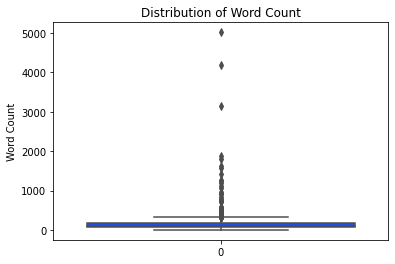

In [24]:
# Boxplot to visualize word count
sns.boxplot(data['word_count'], palette='bright')
plt.title('Distribution of Word Count')
plt.ylabel('Word Count')

plt.tick_params(labelsize=10)
plt.show()

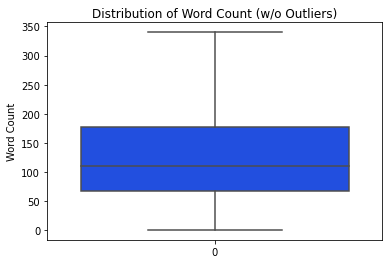

In [25]:
# Boxplot to visualize word count without outliers for clarity
sns.boxplot(data['word_count'], palette='bright', showfliers=False)
plt.title('Distribution of Word Count (w/o Outliers)')
plt.ylabel('Word Count')

plt.tick_params(labelsize=10)
plt.show()

**Observation(s)**:
- Most tweets contain between 50 to 200 words; however, some can exceed 3000 words!

Boxplot for Emoji Count

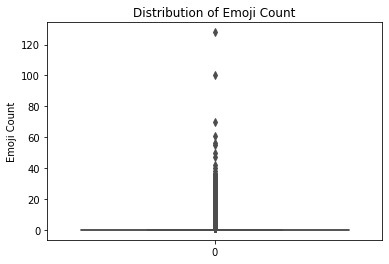

In [26]:
# Boxplot to visualize emoji count
sns.boxplot(data['emoji_count'], palette='bright')
plt.title('Distribution of Emoji Count')
plt.ylabel('Emoji Count')

plt.tick_params(labelsize=10)
plt.show()

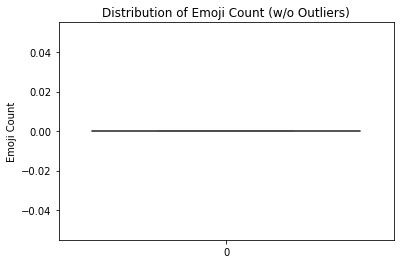

In [27]:
# Boxplot to visualize word count without outliers for clarity
sns.boxplot(data['emoji_count'], palette='bright', showfliers=False)
plt.title('Distribution of Emoji Count (w/o Outliers)')
plt.ylabel('Emoji Count')

plt.tick_params(labelsize=10)
plt.show()

**Observation(s)**:
- Most tweets contain no emojis, but some contain more than 50 emojis!

### Multivariate analysis

Correlation matrix to visualize potential relationships

<AxesSubplot: title={'center': 'Correlation between Numerical Variables'}>

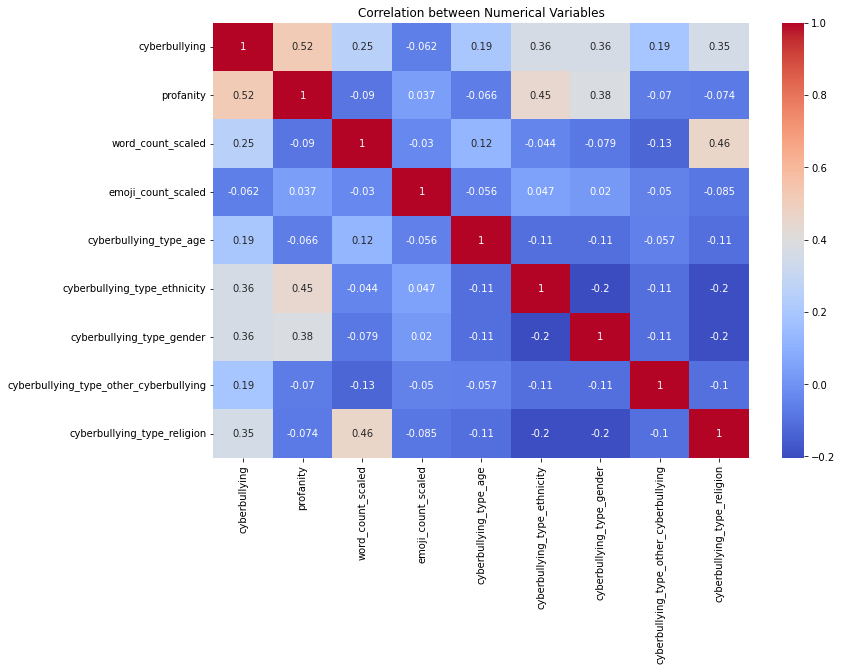

In [28]:
plt.figure(figsize=(12,8))
plt.title('Correlation between Numerical Variables')
sns.heatmap(encoded_data.corr(numeric_only=True), cmap='coolwarm', annot=True)

**Observation(s)**:
- Variables with high positive correlation between each other:
    - cyberbullying -- profanity
    - profanity -- ethnicity_cyberbullying_type
    - profanity -- gender_cyberbullying_type
    - word_count_scaled -- religion_cyberbullying_type
- Emoji_count does not appear to have any notable correlation with any other variables
- Age_cyberbullying and other_cyberbullying also appears to not have much correlation with the other variables, indicating this type of cyberbullying is more subtle than others

Count plots for profanity

<AxesSubplot: title={'center': 'Profanity grouped by Cyberbullying'}, xlabel='profanity', ylabel='count'>

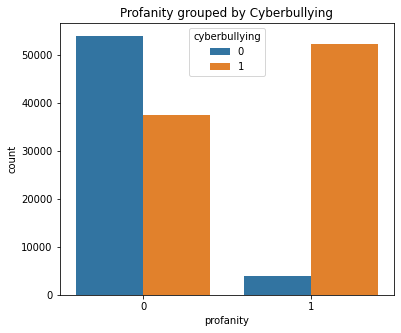

In [29]:
plt.figure(figsize=(6,5))
plt.title('Profanity grouped by Cyberbullying')
sns.countplot(x=data['profanity'], hue=data['cyberbullying'])

**Observation(s)**:
- The proporition of cyberbullying without profanity is considerably lower than the proporition of cyberbullying with profanity
    - This indicates that profanity strongly implies cyberbullying
    - However, there are many tweets without profanity that are still cyberbullying

<AxesSubplot: title={'center': 'Cyberbullying grouped by Profanity'}, xlabel='cyberbullying_type', ylabel='count'>

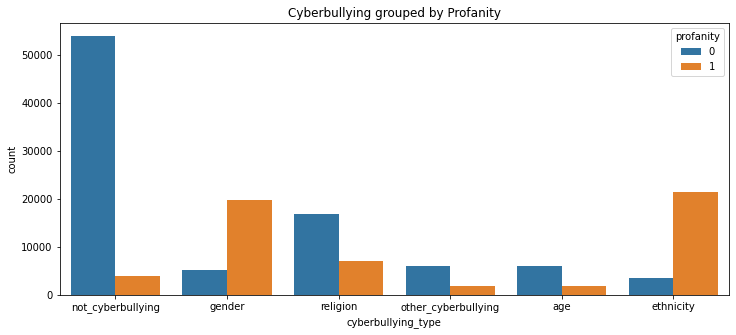

In [30]:
plt.figure(figsize=(12,5))
plt.title('Cyberbullying grouped by Profanity')
sns.countplot(x=data['cyberbullying_type'], hue=data['profanity'])

**Observation(s)**:
- As seen previously, most non-cyberbullying texts do not contain profanity
- Most gender cyberbullying and ethnicity cyberbullying contain profanity
- Other forms of cyberbullying do not have a significant correlation; in fact, most of these types do not contain profanity

Count plots and pivot tables for Word Count

cyberbullying
0    105.273595
1    147.707777
Name: word_count, dtype: float64


<AxesSubplot: title={'center': 'Average Word Count by Cyberbullying'}, xlabel='cyberbullying', ylabel='word_count'>

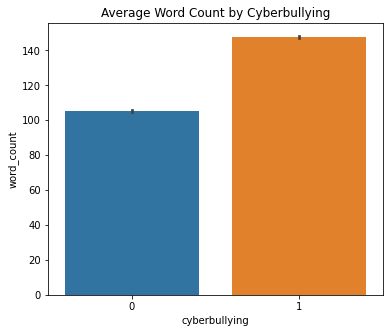

In [31]:
cyberbullying_word_count = data.groupby('cyberbullying')["word_count"].mean()
print(cyberbullying_word_count)

plt.figure(figsize=(6,5))
plt.title('Average Word Count by Cyberbullying')
sns.barplot(x='cyberbullying', y='word_count', data=data)

**Observation(s)**:
- Cyberbullying tweets have, on average, more words per tweet compared to non-cyberbullying tweets

cyberbullying_type
age                    173.542042
ethnicity              123.085620
gender                 116.538801
not_cyberbullying      105.273595
other_cyberbullying     85.713281
religion               217.356485
Name: word_count, dtype: float64


<AxesSubplot: title={'center': 'Average Word Count by Cyberbullying Type'}, xlabel='cyberbullying_type', ylabel='word_count'>

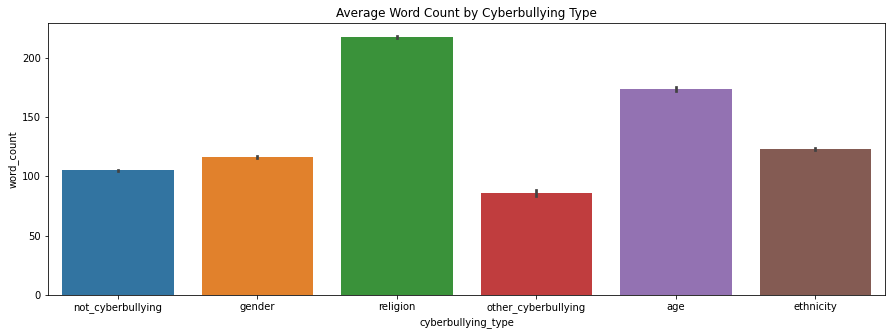

In [32]:
cyberbullying_type_word_count = data.groupby('cyberbullying_type')["word_count"].mean()
print(cyberbullying_type_word_count)

plt.figure(figsize=(15,5))
plt.title('Average Word Count by Cyberbullying Type')
sns.barplot(x='cyberbullying_type', y='word_count', data=data)

**Observation(s)**:
- On average, religion cyberbullying and age cyberbullying messages have significantly more words compared to non-cyberbullying messages
- Curiously, other-cyberbullying messages generally have less words compared to all forms of cyberbullying as well as non-cyberbullying

Count plots and pivot tables for Emoji Count

cyberbullying
0    0.414785
1    0.246776
Name: emoji_count, dtype: float64


<AxesSubplot: title={'center': 'Average Emoji Count by Cyberbullying'}, xlabel='cyberbullying', ylabel='emoji_count'>

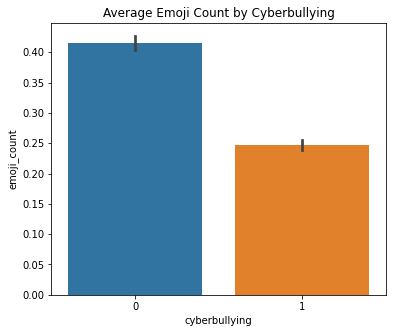

In [33]:
cyberbullying_emoji_count = data.groupby('cyberbullying')["emoji_count"].mean()
print(cyberbullying_emoji_count)

plt.figure(figsize=(6,5))
plt.title('Average Emoji Count by Cyberbullying')
sns.barplot(x='cyberbullying', y='emoji_count', data=data)

**Observation(s)**:
- Cyberbullying tweets have, on average, less emojis per tweet compared to non-cyberbullying tweets (though not a significant difference)

cyberbullying_type
age                    0.000501
ethnicity              0.451180
gender                 0.370611
not_cyberbullying      0.414785
other_cyberbullying    0.032213
religion               0.057323
Name: emoji_count, dtype: float64


<AxesSubplot: title={'center': 'Average Emoji Count by Cyberbullying Type'}, xlabel='cyberbullying_type', ylabel='emoji_count'>

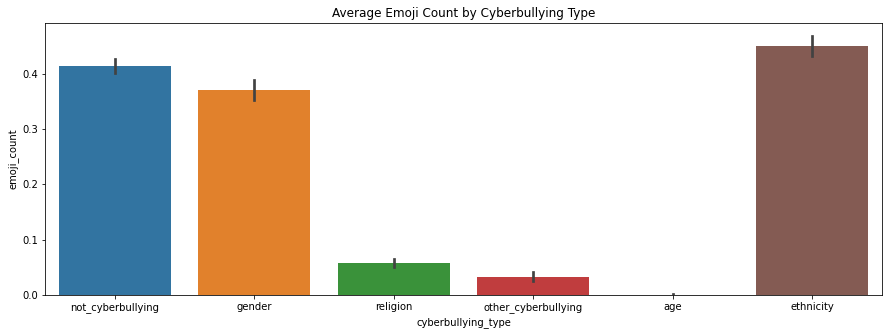

In [34]:
cyberbullying_type_emoji_count = data.groupby('cyberbullying_type')["emoji_count"].mean()
print(cyberbullying_type_emoji_count)

plt.figure(figsize=(15,5))
plt.title('Average Emoji Count by Cyberbullying Type')
sns.barplot(x='cyberbullying_type', y='emoji_count', data=data)

**Observation(s)**:
- Interestingly, ethnicity cyberbullying, gender cyberbullying, and non-cyberbullying  messages have a generally higher number of emojis
- Age cyberbullying, other-cyberbullying, and religion cyberbullying messages typically have less emojis
- Overall, emoji use is not a strong indicator of cyberbullying

## 4. **Analysis Summary**

- PROFANITY:
    - Profanity is a reliable indicator of cyberbullying; however, not all cyberbullying contains profanity
    - Cyberbullying tweets related to gender and ethnicity contain a relatively high amount profanity compared to other forms of cyberbullying and non-cyberbullying tweets
- WORD COUNT:
    - Word count is mildly tied to cyberbullying; cyberbullying tweets generally contain more words than non-cyberbullying tweets
    - Cyberbullying tweets related to religion and age contain noticable more words compared to other forms of cyberbullying and non-cyberbullying messages
    - While there does appear to be some correlation between word count and specific cyberbullying types, it would not be practical use word count as an indicator of cyberbullying
- EMOJI COUNT:
    - Emoji count has little correlation with cyberbullying; cyberbullying tweets have slightly less emojis per tweet compared to non-cyberbullying tweets
    - Cyberbullying tweets related to gender and ethnicity have a comparatively high emoji use, but non-cyberbullying tweets also possess frequent emoji usage
    - Emoji count provides little insight into the content of the messages; however, categorizing emojis as positive or negative and counting the number of positive/negative emojis may produce meaningful results

***
# **SECTION 2** : CYBERBULLYING DETECTION

**OVERVIEW** </br>
Cyberbullying detection is essentially a binary classification and/or sentiment analysis problem on text data. First, the text data will be cleaned and preprocessed. Then, analysis on the semantics of the text, such as determining most common words, will be conducted. Next, machine learning models, deep learning models, and natural language processing tools that specialize in binary classification will be trained on the preprocessed text data. Model accuracy will be the main metric to compare these models against.

Import libraries for binary classification

In [35]:
import os
import joblib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Sentiment analysis
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Machine learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Input, Dense, Flatten, Dropout,
    LSTM, Conv1D, MaxPooling1D,
    GlobalAveragePooling1D, Embedding)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

2025-07-03 22:05:12.654427: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-03 22:05:12.692189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2025-07-03 22:05:14.675571: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Define a helper function for evaluating model performance

In [36]:
def evaluate_model(model_name, y_true, y_pred, cmap='Blues', ax=None, subplot=False, target_names=None, labels='auto', rotation=0):
    '''
    Computes model accuracy, classification report, and visualizes confusion matrix for model evaluation.
    '''
    accuracy = accuracy_score(y_true, y_pred)
    print(f'\nMODEL: {model_name}')
    print('ACCURACY:', accuracy)
    print('\n----------------CLASSIFICATION REPORT----------------\n',
        classification_report(y_true, y_pred, target_names=target_names),
        '-----------------------------------------------------')
    
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    
    if not subplot:
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.xticks(rotation=rotation)
        plt.ylabel('Actual')
        plt.show()
      
    return {'MODEL': model_name, 'ACCURACY': accuracy}

## 1. **Text preprocessing**

A function that executes the following series of pre-processing steps:
- Convert text to lowercase
- Remove twitter tags
- Remove stopwords
- Remove punctuation
- Apply lemmatization

In [37]:
nltk.download('punkt')
nltk.download('wordnet')
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

# Twitter TEXT_CLEANING_RE key and STOPWORDS from https://www.kaggle.com/code/lizakonopelko/cyberbullying-on-twitter-visualization/notebook
def preprocessing(text):
    '''
    Cleans text by lowercasing, removing numbers/twitter tags/stopwords/punctuation, and lemmatizing
    '''
    
    # Lowercasing
    text = text.lower()

    # Removing numbers
    text = re.sub(r'\d+', '', text)

    # Removing twitter tags
    text = re.sub(TEXT_CLEANING_RE, ' ', text)

    # Removing stopwords
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in STOPWORDS])

    # Removing punctuation
    text = re.sub(f'[{string.punctuation}]', '', text)

    # Applying lemmatization
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in words])
    
    return text

[nltk_data] Downloading package punkt to /voc/work/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /voc/work/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
data['cleaned_text'] = data['tweet_text'].apply(preprocessing)

data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying,word_count,emoji_count,profanity,cleaned_text
104716,Check out this awesome video!! https://t.co/DJ...,not_cyberbullying,0,54,0,0,check awesome video
42382,girl don’t worry i’ll legit do it i just gotta...,ethnicity,1,88,0,0,girl worry legit got ta finish one first almos...
121549,@Slowzenx @HillmanAnaya @Pao10826621 No nigga ...,ethnicity,1,68,0,1,hillmananaya pao nigga stfu punk as nigga
19284,Don't show paper cutting show some conclusive ...,religion,1,235,0,0,show paper cutting show conclusive statement c...
76039,@Cindtrillella nigga got a B so i guess he don...,ethnicity,1,134,0,1,nigga got b guess dont care much elevating art...
44947,“@chiIIful: FUCK MIKE BROWN. FUCK TRAYVON MART...,ethnicity,1,136,0,1,chiiiful fuck mike brown fuck trayvon martin n...
64876,@MutsauJohn Hey! I got this: https://t.co/5jv...,not_cyberbullying,0,54,0,0,hey got
137286,#BTC really wants to stay above the 21K USD. L...,not_cyberbullying,0,60,0,0,btc really want stay usd let go bull
18223,@AbbsWinston @andyblueskyz Jews need to be tra...,religion,1,132,0,0,andyblueskyz jew need trained liberate palesti...
108707,@yoongithepixie @BTS_twt He would EAT!,not_cyberbullying,0,38,0,1,bts twt eat


## 2. **Text analysis**

Visualize text patterns using bar graphs of top five most common words

In [39]:
def get_most_common(cyberbullying_type, num):
    '''
    Helper function to find the most common words.
    '''
    data_column = data[data['cyberbullying_type']==cyberbullying_type]
    all_text = ' '.join(data_column['cleaned_text'])

    words = re.findall(r'\b\w+\b', all_text)
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(num)
    return most_common_words

In [40]:
def plot_most_common_words(cyberbullying_type, num, ax, palette):
    '''
    Helper function to plot most common words
    '''
    # Get the most common words
    most_common_words = get_most_common(cyberbullying_type, num)

    # Separate the words and counts for plotting
    words, counts = zip(*most_common_words)

    sns.barplot(x=list(counts), y=list(words), ax=ax, orient='h', palette=palette)

    ax.set_title(f'Most Common Words ({cyberbullying_type})', fontsize=30)
    ax.tick_params(axis='x', rotation=0, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

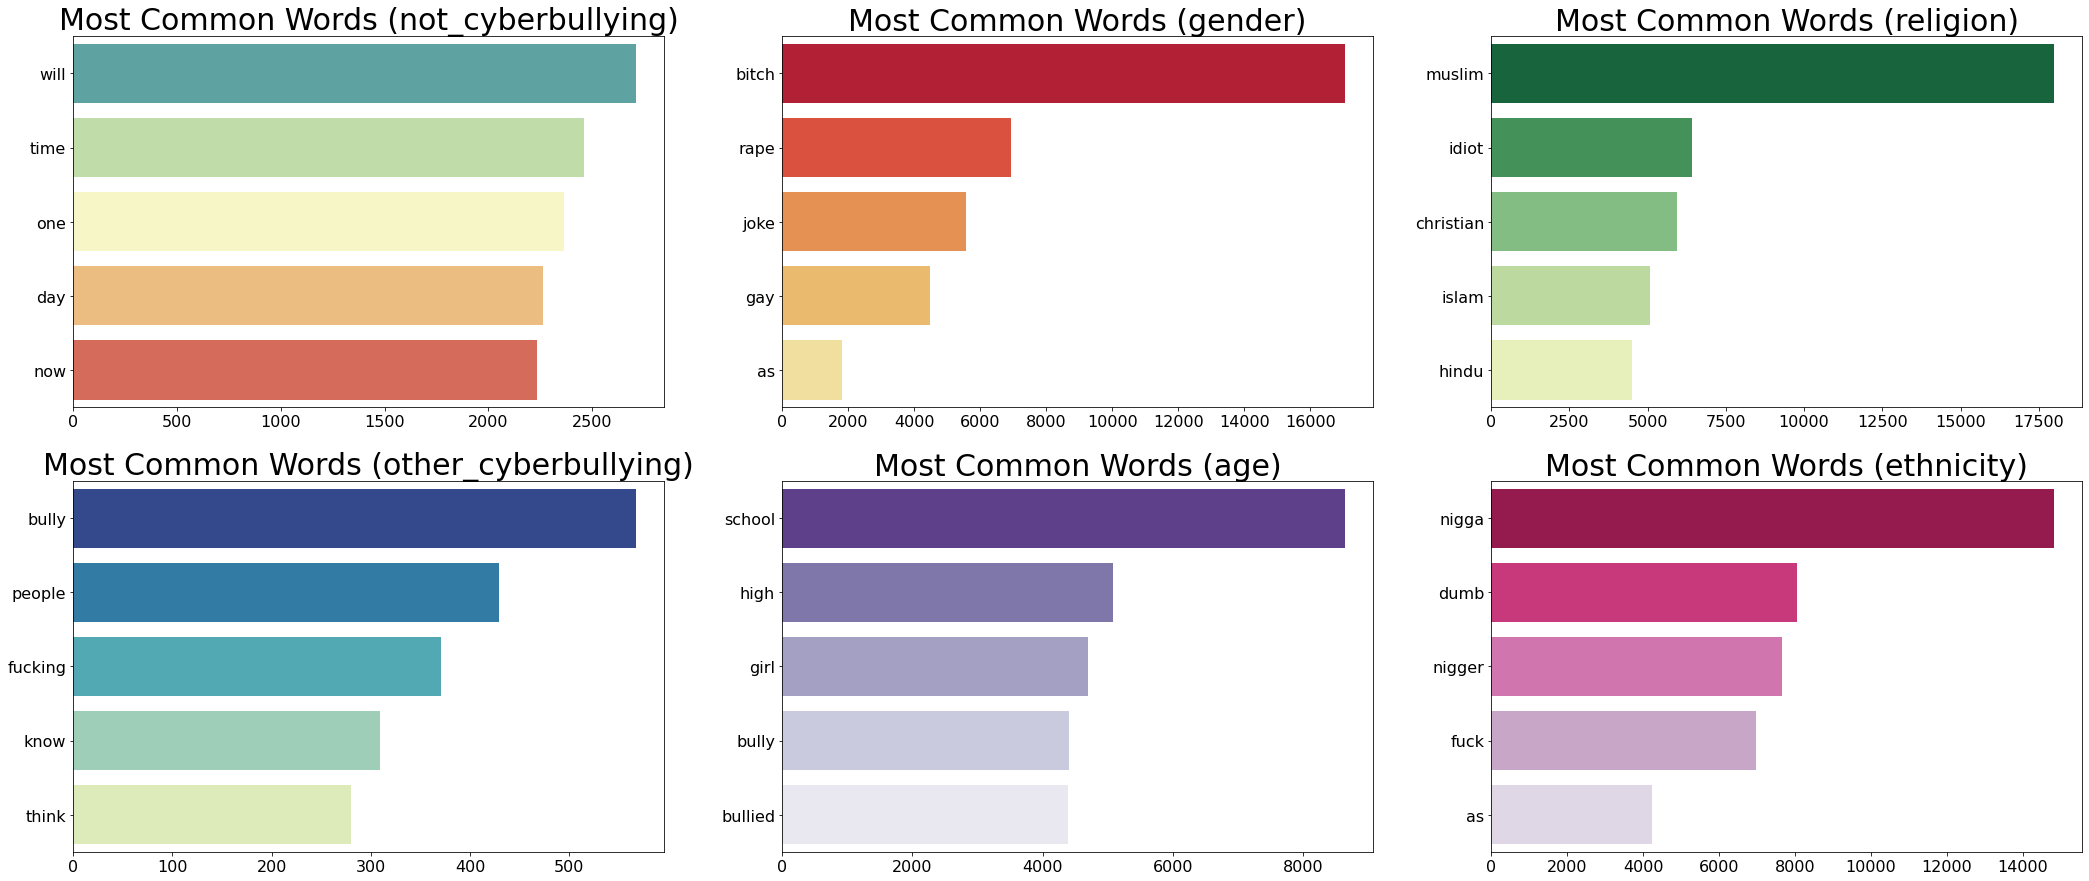

In [41]:
colormaps = ['Spectral', 'YlOrRd', 'YlGn', 'YlGnBu', 'Purples', 'PuRd']
fig, axes = plt.subplots(2, 3, figsize=(36, 15))
axes = axes.flatten()

for i, cyberbullying_type in enumerate(data['cyberbullying_type'].unique()):
    plot_most_common_words(cyberbullying_type, 5, axes[i], f'{colormaps[i]}_r')

**Observation(s)**:
- The bar graph displaying the top five most common words allows a numerical frequency to be associated to each word
- The most common words for non-cyberbullying tweets are inoffensive compared to the cyberbullying tweets (which are mostly offensive/profanity) which will help immensely in detection models
- The most common words for each category have little overlap which is helpful for classification models in categorizing text

In [42]:
# Make accuracy list for detection
detection_accuracy_list = []

## 3. **Natural Language Processing Tools**

Use SentimentIntensityAnalyzer from VADER to predict sentiments from the complaints

In [43]:
analyzer = SentimentIntensityAnalyzer()

Define helper functions to classify complaint based on sentiment value

In [44]:
# Function to get compound score
def get_comp(text):
    sentiment_scores = analyzer.polarity_scores(text)
    return sentiment_scores['compound']

# Function to create label
def label_sentiment(compound_score):
    if compound_score < 0:
        return 'negative'
    else:
        return 'positive'

# Function to get sentiment label
def get_label(text):
    return label_sentiment(get_comp(text))

In [45]:
# Apply sentiment analysis to the text column
data['sentiment score'] = data['tweet_text'].apply(get_comp)
data['sentiment'] = data['tweet_text'].apply(get_label)

data.sample(10)

,tweet_text,cyberbullying_type,cyberbullying,word_count,emoji_count,profanity,cleaned_text,sentiment score,sentiment
75427,This happened in the small town I grew up in. ...,not_cyberbullying,0,164,0,0,happened small town grew family still life voc...,0.5267,positive
9168,Me the rest of the night if these blonde bitch...,gender,1,88,0,1,rest night blonde bitch,-0.5994,negative
5137,@EvvyKube it's how I keep my youthful good loo...,not_cyberbullying,0,70,0,0,keep youthful good look will live forever,0.6369,positive
144484,"@fer00065166 @BTS_twt So cute, I miss them",not_cyberbullying,0,42,0,0,bts twt cute miss,0.4593,positive
110260,@pickledswans @RukminiKrishnaa @stillgray he h...,gender,1,157,0,0,rukminikrishnaa stillgray denied know evidence...,-0.8225,negative
134388,"And of course, my guy Giannis https://t.co/H4b...",not_cyberbullying,0,77,0,0,course guy giannis,0.0000,positive
46695,"I beat a kid 6-2 his reaction is... ""I hope i ...",ethnicity,1,109,0,1,beat kid reaction hope hit bus weight fat fuck...,-0.8481,negative
128348,Maybe I’m not leaving anytime soon,not_cyberbullying,0,34,0,0,maybe leaving anytime soon,0.0000,positive
101654,"the pelicans do so much foul baiting, no wonde...",not_cyberbullying,0,126,0,0,pelican much foul baiting wonder guy compete s...,-0.2960,negative
47471,Fuck you dumb nigger I should hang you by my c...,ethnicity,1,74,0,1,fuck dumb nigger hang cherry tree,-0.9022,negative


Evaluate VADER model using accuracy, F1-score, and a confusion matrix and store accuracy score for future comparison


MODEL: VADER
ACCURACY: 0.7019066002912391

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.60      0.74      0.66     57936
           1       0.80      0.68      0.73     89709

    accuracy                           0.70    147645
   macro avg       0.70      0.71      0.70    147645
weighted avg       0.72      0.70      0.71    147645
 -----------------------------------------------------


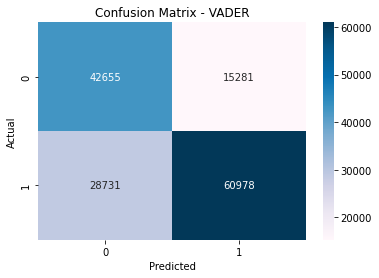

In [46]:
vader_preds = data['sentiment'].apply(lambda x: 0 if x=='positive' else 1)
vader_accuracy = evaluate_model('VADER', data['cyberbullying'], vader_preds, cmap='PuBu')

# Store Sentiment Intensity Analyzer accuracy
detection_accuracy_list.append(vader_accuracy)

**Observation(s)**:
- Model speed: Average
- VADER has an ACCURACY of 70.19%
- VADER has a PRECISION of 80% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 5 instances of cyberbullying, 4 of these instances are true cyberbullying
- VADER has a RECALL of 68% for identifying positive instances of cyberbullying
    - Roughly speaking, if 3 true instances of cyberbullying are given, the model can identify 2 of them as cyberbullying
- Overall, VADER does a decent job at identifying cyberbullying

Model performance on individual cyberbullying types will also be examined


MODEL: VADER (not_cyberbullying)
ACCURACY: 0.7362434410383872

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       1.00      0.74      0.85     57936
           1       0.00      0.00      0.00         0

    accuracy                           0.74     57936
   macro avg       0.50      0.37      0.42     57936
weighted avg       1.00      0.74      0.85     57936
 -----------------------------------------------------

MODEL: VADER (gender)
ACCURACY: 0.7904040404040404

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.79      0.88     24948

    accuracy                           0.79     24948
   macro avg       0.50      0.40      0.44     24948
weighted avg       1.00      0.79      0.88     24948
 -----------------------------------------------------

MODEL: VAD

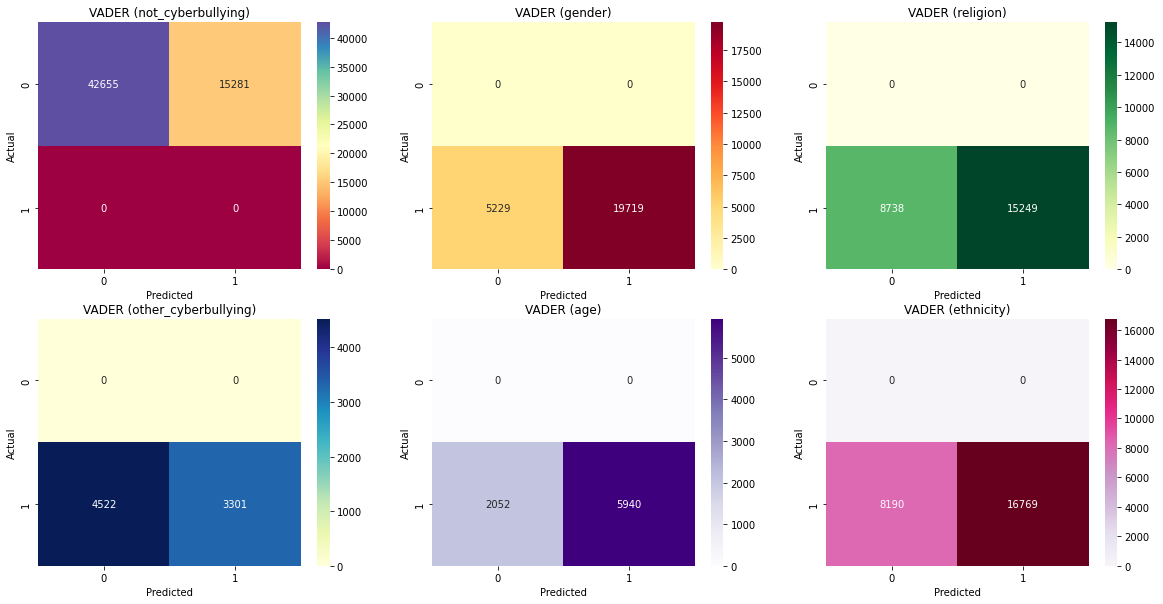

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

for i, cyberbullying_type in enumerate(data['cyberbullying_type'].unique()):
    data_cyberbullying_type = data[data['cyberbullying_type']==cyberbullying_type]
    data_column = data_cyberbullying_type['cyberbullying']
    preds = data_cyberbullying_type['sentiment'].apply(lambda x: 0 if x=='positive' else 1)

    # Evaluate model for each cyberbullying type and plot confusion matrices on dashboard
    evaluate_model(f'VADER ({cyberbullying_type})',
                   data_column,
                   preds,
                   cmap=f'{colormaps[i]}',
                   ax=axes[i],
                   subplot=True)
    axes[i].set_title(f'VADER ({cyberbullying_type})')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

**Observation(s)**:
- ACCURACY SCORES:
    - not_cyberbulling: 73.62%
    - gender: 79.44%
    - religion: 63.58%
    - other_cyberbullying: 42.20%
    - age: 74.34%
    - ethnicity: 67.19%
- VADER does a good job detecting cyberbullying for gender cyberbullying, age cyberbullying, and ethnicity cyberbullying
- The model underperforms for other_cyberbullying

## 4. **Machine Learning Models**

In [48]:
X = data['cleaned_text']
y = data['cyberbullying']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vectorize text data

In [50]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Handle potentional class imbalance (detection)

In [51]:
# Examine class composition based on cyberbullying
cyberbullying_count = y_train.value_counts(normalize=True)
round(cyberbullying_count*100, 2).astype('str') + '%'

cyberbullying
1    60.77%
0    39.23%
Name: proportion, dtype: object

**Observation(s)**:
- There appears to be a slight class imbalance that favors positive instances of cyberbullying over negative instances of cyberbullying
- SMOTE will be used to upsample the minority class

In [52]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vec, y_train)

In [53]:
# Examine class composition based on cyberbullying after upsampling
cyberbullying_count = y_train_balanced.value_counts(normalize=True)
round(cyberbullying_count * 100, 2).astype('str') + '%'

cyberbullying
1    50.0%
0    50.0%
Name: proportion, dtype: object

 Test multiple machine learning binary classification models:
- Logistic Regression
- K-Nearest Neighbors
- Naïve Bayes
- Decision Tree
- Random Forest </br>

Then evaluate models using accuracy, F1-score, and a confusion matrix

### Logistic Regression


MODEL: Logistic Regression
ACCURACY: 0.9335907074401436

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     11603
           1       0.98      0.91      0.94     17926

    accuracy                           0.93     29529
   macro avg       0.93      0.94      0.93     29529
weighted avg       0.94      0.93      0.93     29529
 -----------------------------------------------------


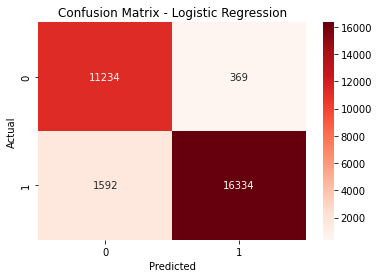

In [54]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)

log_reg_preds = log_reg.predict(X_test_vec)
log_reg_accuracy = evaluate_model('Logistic Regression', y_test, log_reg_preds, cmap='Reds')

# Store Logistic Regression accuracy
detection_accuracy_list.append(log_reg_accuracy)

**Observation(s)**:
- Model speed: Fast
- Logistic Regression has an ACCURACY of 93.36%
- Logistic Regression has a PRECISION of 98% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 50 instances of cyberbullying, 49 of these instances are true cyberbullying!
- Logistic Regression has a RECALL of 91% for identifying positive instances of cyberbullying
    - Roughly speaking, if 10 true instances of cyberbullying are given, the model can identify 9 of them as cyberbullying
- Overall, Logistic Regression does a superb job at identifying cyberbullying

### K-Nearest Neighbors


MODEL: K-Nearest Neighbors
ACCURACY: 0.46814995428223105

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.42      0.98      0.59     11603
           1       0.92      0.14      0.24     17926

    accuracy                           0.47     29529
   macro avg       0.67      0.56      0.41     29529
weighted avg       0.73      0.47      0.38     29529
 -----------------------------------------------------


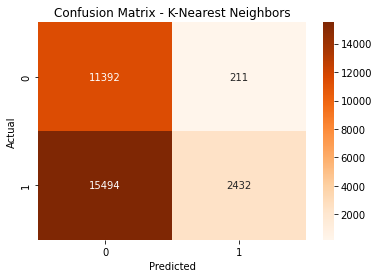

In [55]:
knn = KNeighborsClassifier()
knn.fit(X_train_balanced, y_train_balanced)

knn_preds = knn.predict(X_test_vec)
knn_accuracy = evaluate_model('K-Nearest Neighbors', y_test, knn_preds, cmap='Oranges')

# Store K-Nearest Neighbors accuracy
detection_accuracy_list.append(knn_accuracy)

**Observation(s)**:
- Model speed: Very slow
- K-Nearest Neighbors has an ACCURACY of 46.81%
- K-Nearest Neighbors has a PRECISION of 92% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 25 instances of cyberbullying, 23 of these instances are true cyberbullying
- K-Nearest Neighbors has a RECALL of 14% for identifying positive instances of cyberbullying
    - Roughly speaking, if 7 true instances of cyberbullying are given, the model can identify 1 of them as cyberbullying
- Overall, K-Nearest Neighbors does a poor job at identifying cyberbullying

### Naïve Bayes


MODEL: Naïve Bayes
ACCURACY: 0.9155067899353179

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.86      0.93      0.90     11603
           1       0.95      0.90      0.93     17926

    accuracy                           0.92     29529
   macro avg       0.91      0.92      0.91     29529
weighted avg       0.92      0.92      0.92     29529
 -----------------------------------------------------


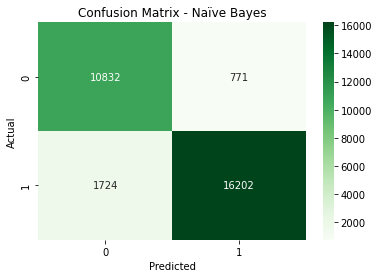

In [56]:
nb = BernoulliNB()
nb.fit(X_train_balanced, y_train_balanced)

nb_preds = nb.predict(X_test_vec)
nb_accuracy = evaluate_model('Naïve Bayes', y_test, nb_preds, cmap='Greens')

# Store Naïve Bayes accuracy
detection_accuracy_list.append(nb_accuracy)

**Observation(s)**:
- Model speed: Extremely fast
- Naïve Bayes has an ACCURACY of 91.55%
- Naïve Bayes has a PRECISION of 95% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 20 instances of cyberbullying, 19 of these instances are true cyberbullying
- Naïve Bayes has a RECALL of 90% for identifying positive instances of cyberbullying
    - Roughly speaking, if 10 true instances of cyberbullying are given, the model can identify 9 of them as cyberbullying
- Overall, Naïve Bayes does an excellent job at identifying cyberbullying

### Decision Tree


MODEL: Decision Tree
ACCURACY: 0.922449117816384

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     11603
           1       0.93      0.94      0.94     17926

    accuracy                           0.92     29529
   macro avg       0.92      0.92      0.92     29529
weighted avg       0.92      0.92      0.92     29529
 -----------------------------------------------------


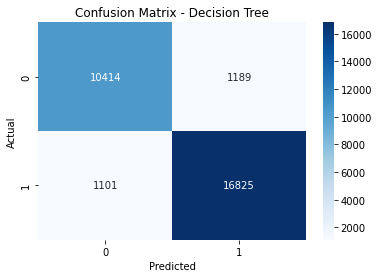

In [57]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_balanced, y_train_balanced)

dec_tree_preds = dec_tree.predict(X_test_vec)
dec_tree_accuracy = evaluate_model('Decision Tree', y_test, dec_tree_preds, cmap='Blues')

# Store Decision Tree accuracy
detection_accuracy_list.append(dec_tree_accuracy)

**Observation(s)**:
- Model speed: Slow
- Decision Tree has an ACCURACY of 92.24%
- Decision Tree has a PRECISION of 93% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 15 instances of cyberbullying, 14 of these instances are true cyberbullying
- Decision Tree has a RECALL of 94% for identifying positive instances of cyberbullying
    - Roughly speaking, if 17 true instances of cyberbullying are given, the model can identify 16 of them as cyberbullying
- Overall, Decision Tree does an excellent job at identifying cyberbullying

### Random Forest


MODEL: Random Forest
ACCURACY: 0.9335568424260896

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     11603
           1       0.96      0.93      0.94     17926

    accuracy                           0.93     29529
   macro avg       0.93      0.93      0.93     29529
weighted avg       0.93      0.93      0.93     29529
 -----------------------------------------------------


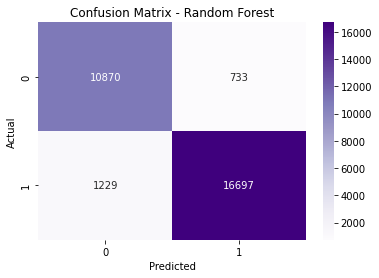

In [58]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_balanced, y_train_balanced)

ran_for_preds = ran_for.predict(X_test_vec)
ran_for_accuracy = evaluate_model('Random Forest', y_test, ran_for_preds, cmap='Purples')

# Store Random Forest accuracy
detection_accuracy_list.append(ran_for_accuracy)

**Observation(s)**:
- Model speed: Extremely slow
- Random Forest has an ACCURACY of 93.36%
- Random Forest has a PRECISION of 96% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 25 instances of cyberbullying, 24 of these instances are true cyberbullying
- Random Forest has a RECALL of 93% for identifying positive instances of cyberbullying
    - Roughly speaking, if 15 true instances of cyberbullying are given, the model can identify 14 of them as cyberbullying
- Overall, Random Forest does a superb job at identifying cyberbullying

## 5. **Deep Learning Models**

Tokenize text data

In [59]:
MAX_NB_WORDS = 100000

# Vectorize the text samples into 2 integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(X_train)

In [60]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

Find max sequence length

Average length: 11.7
Max length: 443


Text(0, 0.5, 'Frequency')

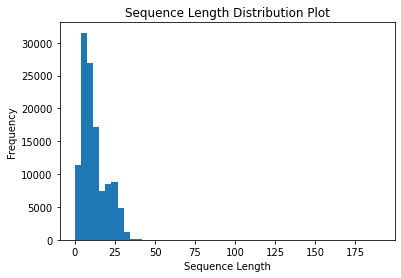

In [61]:
sequence_lens = [len(seq) for seq in X_train_seq]
print('Average length: %0.1f' % np.mean(sequence_lens))
print('Max length: %d' % max(sequence_lens))

plt.hist([length for length in sequence_lens if length < 200], bins=50)
plt.title('Sequence Length Distribution Plot')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

Since most sequences are under 50, the max sequence length will be set to 50 for computational efficiency

In [62]:
MAX_SEQUENCE_LENGTH = 50

# Pad sequences with 0s
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

In [63]:
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pad, y_train)

One-hot encode the output classes (True/False)

In [64]:
y_train_cat = to_categorical(np.asarray(y_train_balanced))
y_test_cat = to_categorical(np.asarray(y_test))

Build a CNN-LSTM hybrid model with the following layers:
- Input layer with input shape = MAX_SEQUENCE_LENGTH and dtype int32
- Embedding layer with input dimension = MAX_NB_WORDS, output dimension =50, and input length = MAX_SEQUENCE_LENGTH 
- Conv1D layer with 128 filters and kernel size 5 and activation relu
- MaxPooling1D with pool size = 5
- Dropout(0.3)
- Conv1D layer with 128 filters and kernel size 5 and activation relu
- MaxPooling1D with pool size = 5 
- Dropout(0.3)
- LSTM layer with 128 units
- Dense layer with 2 neurons and activation softmax

In [65]:
EMBEDDING_DIM = 100

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
x = embedding_layer(sequence_input)

# CNN layers
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.3)(x)

x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.3)(x)

# LSTM layer
x = LSTM(128)(x)
predictions = Dense(2, activation='softmax')(x)

Compile the model with Adam optimizer, cateogrical crossentropy loss function, and metric accuracy

In [66]:
detection_model = Model(sequence_input, predictions)

detection_model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

Use Reduce Learning Rate on Plateau and early stopping to monitor validation loss

In [67]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            factor=0.5,
                                            patience=2,
                                            verbose=1,
                                            min_lr=0.0001)

early_stop = EarlyStopping(patience=3, verbose=1)

Train the hybrid model for 10 epochs with early stopping

In [68]:
detection_history = detection_model.fit(X_train_balanced,
                                        y_train_cat,
                                        validation_split=0.1,
                                        epochs=10,
                                        batch_size=64,
                                        callbacks=[learning_rate_reduction, early_stop])

Epoch 1/10
2019/2019 [==============================] - 167s 82ms/step - loss: 0.3016 - accuracy: 0.8763 - val_loss: 0.6316 - val_accuracy: 0.7683 - lr: 0.0010
Epoch 2/10
2019/2019 [==============================] - 164s 81ms/step - loss: 0.2093 - accuracy: 0.9158 - val_loss: 0.6974 - val_accuracy: 0.7221 - lr: 0.0010
Epoch 3/10
2019/2019 [==============================] - 165s 81ms/step - loss: 0.1423 - accuracy: 0.9436 - val_loss: 0.5991 - val_accuracy: 0.7726 - lr: 0.0010
Epoch 4/10
2019/2019 [==============================] - 163s 81ms/step - loss: 0.1046 - accuracy: 0.9576 - val_loss: 1.0012 - val_accuracy: 0.7052 - lr: 0.0010
Epoch 5/10
2019/2019 [==============================] - 162s 80ms/step - loss: 0.0617 - accuracy: 0.9729 - val_loss: 1.1357 - val_accuracy: 0.7541 - lr: 5.0000e-04
Epoch 6: early stopping


Plot training and validation accuracy and loss against epochs for the deep learning detection model

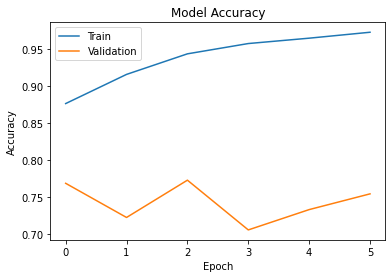

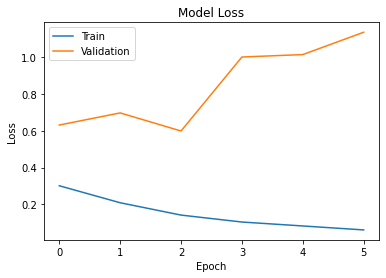

In [69]:
plt.plot(detection_history.history['accuracy'])
plt.plot(detection_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(detection_history.history['loss'])
plt.plot(detection_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**:
- Training accuracy increases smoothly 
- Validation accuracy remains steady
- Training loss decreases continuously
- Validation loss increases slightly (learning rate reduction and early stopping prevented overfitting)

Test CNN-LSTM hybrid model and store accuracy score

923/923 [==============================] - 3s 3ms/step

MODEL: CNN-LSTM
ACCURACY: 0.8877713434251076

----------------CLASSIFICATION REPORT----------------
               precision    recall  f1-score   support

           0       0.82      0.92      0.87     11603
           1       0.94      0.87      0.90     17926

    accuracy                           0.89     29529
   macro avg       0.88      0.89      0.88     29529
weighted avg       0.89      0.89      0.89     29529
 -----------------------------------------------------


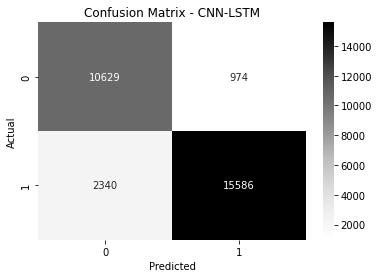

In [70]:
y_preds = (detection_model.predict(X_test_pad) > 0.5).astype('int32')

# Switching from Multi-Label format to Multiclass
cnn_lstm_preds = []
weights = [0, 1]
for j in range(len(y_preds)):
    weighted_pred = [y_preds[j][i] * weights[i] for i in range(len(y_preds[j]))]
    prediction = sum(weighted_pred)
    cnn_lstm_preds.append(prediction)

cnn_lstm_accuracy = evaluate_model('CNN-LSTM', y_test, cnn_lstm_preds, cmap='Greys')

# Store CNN-LSTM accuracy
detection_accuracy_list.append(cnn_lstm_accuracy)

**Observation(s)**:
- Model speed: Very slow
- CNN-LSTM has an ACCURACY of 88.69%
- CNN-LSTM has a PRECISION of 94% for identifying positive instances of cyberbullying
    - In other words, if the model identifies 17 instances of cyberbullying, 16 of these instances are true cyberbullying
- CNN-LSTM has a RECALL of 87% for identifying positive instances of cyberbullying
    - Roughly speaking, if 8 true instances of cyberbullying are given, the model can identify 7 of them as cyberbullying
- Overall, CNN-LSTM does a good job at identifying cyberbullying

## 6. **Detection Summary**

Model Accuracy Comparison

In [71]:
# Sort by accuracy in descending order
sorted_detection_accuracy_list = sorted(detection_accuracy_list, key=lambda x: x['ACCURACY'], reverse=True)

# Print sorted models
print('----------------MODELS RANKED BY PERFORMANCE----------------\n')
for i, model_dict in enumerate(sorted_detection_accuracy_list):
    print(f"{i+1}. {model_dict['MODEL']}")
    print(f"    ACCURACY: {model_dict['ACCURACY']}\n")
print('------------------------------------------------------------')

----------------MODELS RANKED BY PERFORMANCE----------------

1. Logistic Regression
    ACCURACY: 0.9335907074401436

2. Random Forest
    ACCURACY: 0.9335568424260896

3. Decision Tree
    ACCURACY: 0.922449117816384

4. Naïve Bayes
    ACCURACY: 0.9155067899353179

5. CNN-LSTM
    ACCURACY: 0.8877713434251076

6. VADER
    ACCURACY: 0.7019066002912391

7. K-Nearest Neighbors
    ACCURACY: 0.46814995428223105

------------------------------------------------------------


### **SUMMARY**:
- MACHINE LEARNING MODELS: Logistic Regression, Random Forest, Decision Tree, Naïve Bayes, K-Nearest Neighbors
    - The traditional machine learning models, aside from K-Nearest Neighbors, have very high performance (all exceeding 0.9 accuracy)
    - Logistic Regression is placed the highest and is one of the fastest algorithms
    - However, Random Forest has almost the same accuracy score and has generally higher detection precision and recall
- DEEP LEARNING MODELS: Convolutional + Recurrent Neural Network (CNN-LSTM)
    - The CNN-LSTM hybrid model performed surprisingly well on test data (as validation accuracy seemed to stagnate at a lower score)
    - Adding additional layers and hyperparameter tuning could be used to improve detection
- NATURAL LANGUAGE PROCESSING TOOLS: Valence Aware Dictionary and sEntiment Reasoner (VADER)
    - The VADER model did not perform as well as the other models
    - This is surprising since VADER specializes with analyzing short text passages such as tweets, customer reviews, or comments that may contain slang, emojis and abbreviations
    - The most likely explanation is that some forms of cyberbullying are more subtle than others and thus the VADER model would not detect a high enough negative sentiment
        - For example, a high proportion of religion cyberbullying, age cyberbullying, and "other" cyberbullying do not contain profanity and use other semantics to be considered offensive <br>

#### Overall, the best model to use for cyberbullying detection is **Logistic Regression** for its high performance and efficiency!

In [72]:
# Save best model and vectorizer for future testing and experientation
folder_path = 'models/detection/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

joblib.dump(log_reg, os.path.join(folder_path, 'detection_model.pkl'))
joblib.dump(vectorizer, os.path.join(folder_path, 'detection_vectorizer.pkl'))

['models/detection/detection_vectorizer.pkl']

***
# **SECTION 3** : CYBERBULLYING CATEGORIZATION

**OVERVIEW** </br>
Cyberbullying categorization is a multi-class classification problem on text data. Given that the previous detection model classified the text as cyberbullying, the models in this section aim to categorize the text based on what type of cyberbullying is being presented. First, the DataFrame will be preprocessed once more to only include positive instances of cyberbullying and class imbalanced will be handled. Next, machine learning models and deep learning models that specialize in multi-class classification will be trained on the preprocessed text data. Model accuracy will be the main metric to compare these models against.

Import libraries for categorization

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from transformers import TFBertForSequenceClassification, BertTokenizer

## 1. **Data preprocessing**

Create a new DataFrame by dropping non-cyberbullying rows from original DataFrame

In [74]:
# Drop non-cyberbullying rows
non_cyberbullying_rows = data[data['cyberbullying'] == 0].index
cyberbullying_data = data.drop(non_cyberbullying_rows, axis=0)

# Check if all negative instances of cyberbullying have been dropped
print(cyberbullying_data['cyberbullying'].unique() == 1)

[ True]


Perform train-test split and vectorization on new dataset

In [75]:
X = cyberbullying_data['cleaned_text']
y = cyberbullying_data['cyberbullying_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Handle potential class imbalance (categorization)

In [77]:
# Examine class composition based on cyberbullying type
cyberbullying_types_composition = y_train.value_counts(normalize=True)
round(cyberbullying_types_composition*100, 2).astype('str') + '%'

cyberbullying_type
gender                 27.95%
ethnicity              27.68%
religion               26.72%
age                     8.93%
other_cyberbullying     8.72%
Name: proportion, dtype: object

**Observation(s)**:
- Ethnicity, gender, and religion have more than triple the amount as age and other_cyberbullying which indicates class imbalance
- SMOTE will be used to upsample the minority classes

In [78]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vec, y_train)

In [79]:
# Examine class composition based on cyberbullying type after upsampling
cyberbullying_types_smote = y_train_balanced.value_counts(normalize=True)
round(cyberbullying_types_smote*100, 2).astype('str') + '%'

cyberbullying_type
ethnicity              20.0%
age                    20.0%
gender                 20.0%
religion               20.0%
other_cyberbullying    20.0%
Name: proportion, dtype: object

Label encode the cyberbullying type column to ensure compatibility with selected models

In [80]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_balanced)
y_test_encoded = encoder.transform(y_test)

## 2. **Machine Learning Models**

 Test multiple machine learning multi-class classification models:
- Decision Tree
- Random Forest
- Naïve Bayes
- Gradient Boosting
- Adaptive Boosting </br>

Then evaluate models using accuracy, F1-score, and a confusion matrix

In [81]:
# Make accuracy list for categorization
categorization_accuracy_list = []

### Decision Tree


MODEL: Decision Tree
ACCURACY: 0.9716865455356147

----------------CLASSIFICATION REPORT----------------
                      precision    recall  f1-score   support

                age       0.98      0.97      0.98      1585
          ethnicity       0.99      0.99      0.99      5091
             gender       0.97      0.96      0.96      4892
other_cyberbullying       0.86      0.89      0.87      1565
           religion       0.99      0.99      0.99      4809

           accuracy                           0.97     17942
          macro avg       0.96      0.96      0.96     17942
       weighted avg       0.97      0.97      0.97     17942
 -----------------------------------------------------


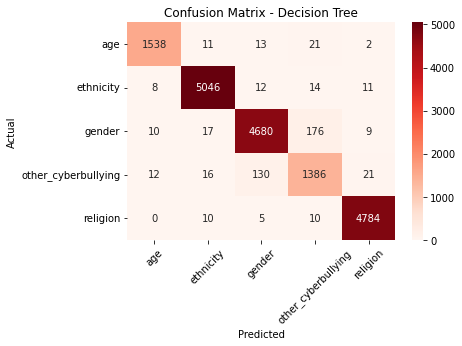

In [82]:
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train_balanced, y_train_encoded)

dec_tree_preds = dec_tree.predict(X_test_vec)
dec_tree_accuracy = evaluate_model('Decision Tree', y_test_encoded, dec_tree_preds, cmap='Reds',
                                   target_names=encoder.classes_, labels=encoder.classes_, rotation=45)

# Store Decision Tree accuracy
categorization_accuracy_list.append(dec_tree_accuracy)

**Observation(s)**:
- Model speed: Average
- Decision Tree has an ACCURACY of 97.17%
- Decision Tree has very high PRECISION for all classes, performing the best on ethnicity and religion (99%) but the worst on other cyberbullying (86%)
- Decision Tree has very high RECALL for all classes, performing the best on ethnicity and religion (99%) but the worst on other cyberbullying (89%)
- Decision Tree has very high F1-SCORES for all classes, performing the best on ethnicity and religion (99%) but the worst on other cyberbullying (87%)
- Overall, Decision Tree does a superb job at categorizing cyberbullying

### Random Forest


MODEL: Random Forest
ACCURACY: 0.9759224166759558

----------------CLASSIFICATION REPORT----------------
                      precision    recall  f1-score   support

                age       0.99      0.98      0.99      1585
          ethnicity       0.99      1.00      0.99      5091
             gender       0.98      0.95      0.96      4892
other_cyberbullying       0.85      0.92      0.88      1565
           religion       0.99      1.00      1.00      4809

           accuracy                           0.98     17942
          macro avg       0.96      0.97      0.96     17942
       weighted avg       0.98      0.98      0.98     17942
 -----------------------------------------------------


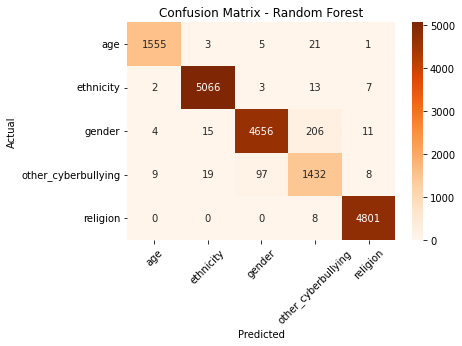

In [83]:
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train_balanced, y_train_encoded)

ran_for_preds = ran_for.predict(X_test_vec)
ran_for_accuracy = evaluate_model('Random Forest', y_test_encoded, ran_for_preds, cmap='Oranges',
                                  target_names=encoder.classes_, labels=encoder.classes_, rotation=45)

# Store Random Forest accuracy
categorization_accuracy_list.append(ran_for_accuracy)

**Observation(s)**:
- Model speed: Extremely slow
- Random Forest has an ACCURACY of 97.59%
- Random Forest has very high PRECISION for all classes, performing the best on age, ethnicity, and religion (99%) but the worst on other cyberbullying (85%)
- Random Forest has very high RECALL for all classes, performing the best on ethnicity and religion (100%) but the worst on other cyberbullying (92%)
- Random Forest has very high F1-SCORES for all classes, performing the best on religion (100%) but the worst on other cyberbullying (88%)
- Overall, Random Forest does a superb job at categorizing cyberbullying

### Naïve Bayes


MODEL: Naïve Bayes
ACCURACY: 0.8596031657563259

----------------CLASSIFICATION REPORT----------------
                      precision    recall  f1-score   support

                age       0.75      0.97      0.84      1585
          ethnicity       0.83      0.92      0.87      5091
             gender       0.92      0.75      0.83      4892
other_cyberbullying       0.85      0.49      0.62      1565
           religion       0.89      0.99      0.94      4809

           accuracy                           0.86     17942
          macro avg       0.85      0.82      0.82     17942
       weighted avg       0.87      0.86      0.85     17942
 -----------------------------------------------------


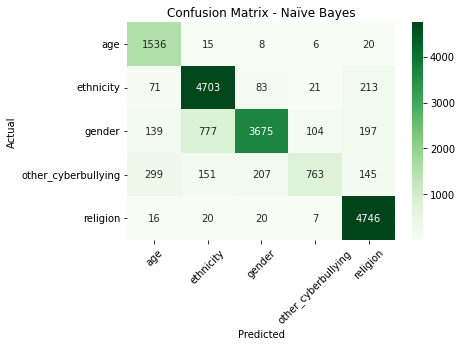

In [84]:
nb = MultinomialNB()
nb.fit(X_train_balanced, y_train_encoded)

nb_preds = nb.predict(X_test_vec)
nb_accuracy = evaluate_model('Naïve Bayes', y_test_encoded, nb_preds, cmap='Greens',
                             target_names=encoder.classes_, labels=encoder.classes_, rotation=45)

# Store Naïve Bayes accuracy
categorization_accuracy_list.append(nb_accuracy)

**Observation(s)**:
- Model speed: Very fast
- Naïve Bayes has an ACCURACY of 85.96%
- Naïve Bayes has very high PRECISION for most classes, performing the best on gender (92%) but the worst on age (75%)
- Naïve Bayes has very high RECALL for most classes, performing the best on religion (99%) but the worst on other cyberbullying (49%)
- Naïve Bayes has very high F1-SCORES for most classes, performing the best on religion (94%) but the worst on other cyberbullying (62%)
- Overall, Naïve Bayes does a good job at categorizing cyberbullying

### Gradient Boosting


MODEL: Gradient Boosting
ACCURACY: 0.9726897781741166

----------------CLASSIFICATION REPORT----------------
                      precision    recall  f1-score   support

                age       0.99      0.98      0.99      1585
          ethnicity       0.99      1.00      0.99      5091
             gender       0.98      0.95      0.96      4892
other_cyberbullying       0.80      0.94      0.87      1565
           religion       1.00      0.98      0.99      4809

           accuracy                           0.97     17942
          macro avg       0.95      0.97      0.96     17942
       weighted avg       0.98      0.97      0.97     17942
 -----------------------------------------------------


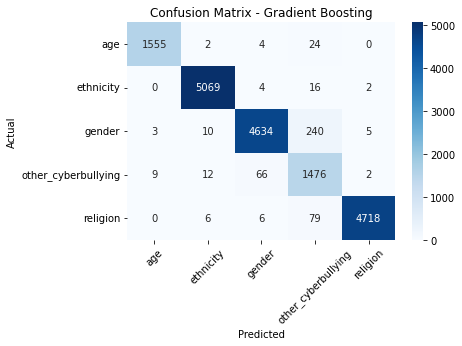

In [85]:
xgb = XGBClassifier()
xgb.fit(X_train_balanced, y_train_encoded)

xgb_preds = xgb.predict(X_test_vec)
xgb_accuracy = evaluate_model('Gradient Boosting', y_test_encoded, xgb_preds, cmap='Blues',
                              target_names=encoder.classes_, labels=encoder.classes_, rotation=45)

# Store Gradient Boosting accuracy
categorization_accuracy_list.append(xgb_accuracy)

**Observation(s)**:
- Model speed: Average
- Gradient Boosting has an ACCURACY of 97.26%
- Gradient Boosting has very high PRECISION for all classes, performing the best on religion (100%) but the worst on other cyberbullying (80%)
- Gradient Boosting has very high RECALL for all classes, performing the best on ethnicity (100%) but the worst on other cyberbullying (94%)
- Gradient Boosting has very high F1-SCORES for all classes, performing the best on age, ethnicity, and religion (99%) but the worst on other cyberbullying (87%)
- Overall, Gradient Boosting does a superb job at categorizing cyberbullying

### Adaptive Boosting


MODEL: Adaptive Boosting
ACCURACY: 0.9508973358599934

----------------CLASSIFICATION REPORT----------------
                      precision    recall  f1-score   support

                age       0.98      0.98      0.98      1585
          ethnicity       0.99      0.97      0.98      5091
             gender       0.98      0.91      0.94      4892
other_cyberbullying       0.70      0.95      0.80      1565
           religion       0.99      0.96      0.98      4809

           accuracy                           0.95     17942
          macro avg       0.93      0.95      0.94     17942
       weighted avg       0.96      0.95      0.95     17942
 -----------------------------------------------------


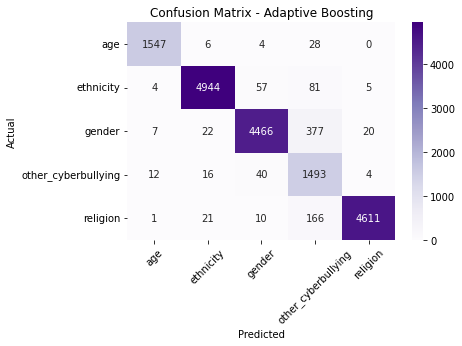

In [86]:
adb = AdaBoostClassifier()
adb.fit(X_train_balanced, y_train_encoded)

adb_preds = adb.predict(X_test_vec)
adb_accuracy = evaluate_model('Adaptive Boosting', y_test_encoded, adb_preds, cmap='Purples',
                              target_names=encoder.classes_, labels=encoder.classes_, rotation=45)

# Store Adaptive Boosting accuracy
categorization_accuracy_list.append(adb_accuracy)

**Observation(s)**:
- Model speed: Fast
- Adaptive Boosting has an ACCURACY of 95.09%
- Adaptive Boosting has very high PRECISION for most classes, performing the best on ethnicity and religion (99%) but the worst on other cyberbullying (70%)
- Adaptive Boosting has very high RECALL for most classes, performing the best on age (98%) but the worst on gender (91%)
- Adaptive Boosting has very high F1-SCORES for most classes, performing the best on age, ethnicity, and religion (98%) but the worst on other cyberbullying (80%)
- Overall, Adaptive Boosting does an excellent job at categorizing cyberbullying

## 3. **Deep Learning Models**

While transformer-based models like BERT are effective at multi-class classification, they are very computationally and memory intensive models. Due to hardware constraints, a hybrid CNN-LSTM model will be used due to its efficient and simpler architecture.

Tokenize text data

In [87]:
MAX_NB_WORDS = 100000

# Vectorize the text samples into 2 integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(X_train)

In [88]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

Find max sequence length

Average length: 13.7
Max length: 443


Text(0, 0.5, 'Frequency')

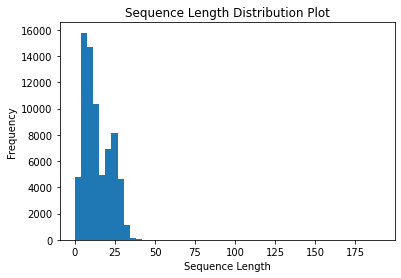

In [89]:
sequence_lens = [len(seq) for seq in X_train_seq]
print('Average length: %0.1f' % np.mean(sequence_lens))
print('Max length: %d' % max(sequence_lens))

plt.hist([length for length in sequence_lens if length < 200], bins=50)
plt.title('Sequence Length Distribution Plot')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

Since most sequences are under 50, the max sequence length will be set to 50 for computational efficiency

In [90]:
MAX_SEQUENCE_LENGTH = 50

# Pad sequences with 0s
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH)
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH)

In [91]:
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_pad, y_train)

Build a CNN-LSTM hybrid model with the following layers:
- Input layer with input shape = MAX_SEQUENCE_LENGTH and dtype int32
- Embedding layer with input dimension = MAX_NB_WORDS, output dimension =50, and input length = MAX_SEQUENCE_LENGTH 
- Conv1D layer with 64 filters and kernel size 5 and activation relu
- MaxPooling1D with pool size = 5
- Dropout(0.2)
- Conv1D layer with 64 filters and kernel size 5 and activation relu
- MaxPooling1D with pool size = 5 
- Dropout(0.2)
- LSTM layer with 64 units
- Dense layer with 5 neurons and activation softmax

In [92]:
EMBEDDING_DIM = 100

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
x = embedding_layer(sequence_input)

# CNN layers
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)

x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)

# LSTM layer with a hidden size of 64
x = LSTM(64)(x)
predictions = Dense(5, activation='softmax')(x)

Compile the model with Adam optimizer, sparse categorical crossentropy loss function and metric accuracy

In [93]:
categorization_model = Model(sequence_input, predictions)

categorization_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

Train the hybrid model for 10 epochs with early stopping

In [94]:
categorization_history = categorization_model.fit(X_train_balanced,
                                                  y_train_encoded,
                                                  validation_split=0.1,
                                                  epochs=10,
                                                  batch_size=64,
                                                  callbacks=[learning_rate_reduction, early_stop])

Epoch 1/10
1411/1411 [==============================] - 108s 75ms/step - loss: 0.5552 - accuracy: 0.7868 - val_loss: 1.2735 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 2/10
1411/1411 [==============================] - 106s 75ms/step - loss: 0.3107 - accuracy: 0.8928 - val_loss: 1.4495 - val_accuracy: 0.5846 - lr: 0.0010
Epoch 3/10
1411/1411 [==============================] - ETA: 0s - loss: 0.2127 - accuracy: 0.9292
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1411/1411 [==============================] - 106s 75ms/step - loss: 0.2127 - accuracy: 0.9292 - val_loss: 1.4587 - val_accuracy: 0.6020 - lr: 0.0010
Epoch 4/10
1411/1411 [==============================] - 106s 75ms/step - loss: 0.1368 - accuracy: 0.9553 - val_loss: 1.5411 - val_accuracy: 0.6035 - lr: 5.0000e-04
Epoch 4: early stopping


Plot training and validation accuracy and loss against epochs for the deep learning categorization model

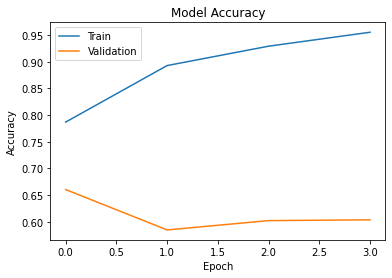

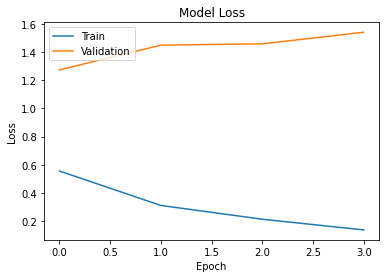

In [95]:
plt.plot(categorization_history.history['accuracy'])
plt.plot(categorization_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(categorization_history.history['loss'])
plt.plot(categorization_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations**:
- Training accuracy increases smoothly 
- Validation accuracy remains steady
- Training loss decreases continuously
- Validation loss increases slightly (learning rate reduction and early stopping prevented overfitting)

Test CNN-LSTM hybrid model and store accuracy score

561/561 [==============================] - 2s 2ms/step

MODEL: CNN-LSTM
ACCURACY: 0.8975030654330621

----------------CLASSIFICATION REPORT----------------
                      precision    recall  f1-score   support

                age       0.68      0.96      0.80      1585
          ethnicity       0.98      0.90      0.94      5091
             gender       0.92      0.85      0.88      4892
other_cyberbullying       0.66      0.77      0.71      1565
           religion       1.00      0.96      0.98      4809

           accuracy                           0.90     17942
          macro avg       0.85      0.89      0.86     17942
       weighted avg       0.91      0.90      0.90     17942
 -----------------------------------------------------


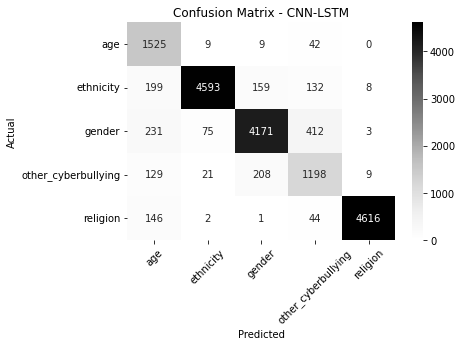

In [96]:
y_preds = (categorization_model.predict(X_test_pad) > 0.5).astype('int32')

# Switching from Multi-Label format to Multiclass
cnn_lstm_preds = []
weights = [0, 1, 2, 3, 4]
for j in range(len(y_preds)):
    weighted_pred = [y_preds[j][i] * weights[i] for i in range(len(y_preds[j]))]
    prediction = sum(weighted_pred)
    cnn_lstm_preds.append(prediction)

cnn_lstm_accuracy = evaluate_model('CNN-LSTM', y_test_encoded, cnn_lstm_preds, cmap='Greys',
                                  target_names=encoder.classes_, labels=encoder.classes_, rotation=45)

# Store CNN-LSTM accuracy
categorization_accuracy_list.append(cnn_lstm_accuracy)

**Observation(s)**:
- Model speed: Slow
- CNN-LSTM has an ACCURACY of 90.14%
- CNN-LSTM has high PRECISION for most classes, performing the best on religion (99%) but the worst on other cyberbullying (69%)
- CNN-LSTM has high RECALL for most classes, performing the best on age (97%) but the worst on other cycberbullying (70%)
- CNN-LSTM has high F1-SCORES for most classes, performing the best on religion (98%) but the worst on other cyberbullying (69%)
- Overall, CNN-LSTM does a good job at categorizing cyberbullying

## 4. **Categorization Summary**

Model accuracy comparison

In [97]:
# Sort by accuracy in descending order
sorted_categorization_accuracy_list = sorted(categorization_accuracy_list, key=lambda x: x['ACCURACY'], reverse=True)

# Print sorted models
print('----------------MODELS RANKED BY PERFORMANCE----------------\n')
for i, model_dict in enumerate(sorted_categorization_accuracy_list):
    print(f"{i+1}. {model_dict['MODEL']}")
    print(f"    ACCURACY: {model_dict['ACCURACY']}\n")
print('------------------------------------------------------------')

----------------MODELS RANKED BY PERFORMANCE----------------

1. Random Forest
    ACCURACY: 0.9759224166759558

2. Gradient Boosting
    ACCURACY: 0.9726897781741166

3. Decision Tree
    ACCURACY: 0.9716865455356147

4. Adaptive Boosting
    ACCURACY: 0.9508973358599934

5. CNN-LSTM
    ACCURACY: 0.8975030654330621

6. Naïve Bayes
    ACCURACY: 0.8596031657563259

------------------------------------------------------------


### **SUMMARY**:
- MACHINE LEARNING MODELS: Random Forest, Gradient Boosting, Decision Tree, Adaptive Boosting, and Naïve Bayes
    - The traditional machine learning models, aside from Naïve Bayes, have very high performance (all exceeding 0.9 accuracy)
    - Random Forest is placed the highest by accuracy
    - Gradient Boosting is ranked second but is more efficient
- DEEP LEARNING MODELS: Convolutional + Recurrent Neural Network (CNN-LSTM)
    - The CNN-LSTM hybrid model performed surprisingly well on test data (as validation accuracy seemed to stagnate at a lower score)
    - Adding additional layers and hyperparameter tuning could be used to improve categorization

#### Overall, the best model to use for cyberbullying categorization is **Random Forest** for its high performance!

In [98]:
# Save best model, vectorizer, and encoder for future testing and experientation
folder_path = 'models/categorization/'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

joblib.dump(ran_for, os.path.join(folder_path, 'categorization_model.pkl'))
joblib.dump(vectorizer, os.path.join(folder_path, 'cateogrization_vectorizer.pkl'))
joblib.dump(encoder, os.path.join(folder_path, 'cateogrization_encoder.pkl'))

['models/categorization/cateogrization_encoder.pkl']

# SECTION 4: MODEL DEPLOYMENT AND CONCLUSION

**OVERVIEW** </br>
Now that the best detection and categorization models have been identified, a small application will be developed that prompts users to input text and the returns an appropriate response based on the text content:
- If the text is not cyberbullying, the application will return 'This message is not cyberbullying.'
- If the text is cyberbullying, the application will return 'This message is cyberbullying.' and then will attempt to identify what type of cyberbullying is present </br>
Finally, a comprehensive conclusion of the project will be included at the end to summarize all insights drawn from the capstone as well as provide possible suggestions on handling cyberbullying.

Reload detection and categorization models

In [ ]:
# Load detection components
detection = joblib.load('models/detection/detection_model.pkl')
detection_vectorizer = joblib.load('models/detection/detection_vectorizer.pkl')

# Load categorization components
categorization = joblib.load('models/categorization/categorization_model.pkl')
categorization_vectorizer = joblib.load('models/categorization/categorization_vectorizer.pkl')
categorization_encoder = joblib.load('models/categorization/categorization_encoder.pkl')

Application that allows users to input text and detection + categorization is applied to text

In [ ]:
print('-------------------CYBERBULLYING IDENTIFIER-------------------')
msg = input('Enter a message: ')

# Preprocess text
cleaned_msg = preprocessing(msg)

# Vectorize text
vectorized_msg = detection_vectorizer.transform([cleaned_msg])

# Detect cyberbullying
detect_pred = detection.predict(vectorized_msg)

def extract_label(categorize_pred):
    '''
    Helper function for extracting label
    '''
    label_block = categorization_encoder.inverse_transform([categorize_pred])
    if label_block[0] == 'other_cyberbullying':
        return 'other'
    else:
        return label_block[0]

# Categorize cyberbullying
if detect_pred == [0]:
    print('This message is not cyberbullying.')
else:
    vectorized_msg = categorization_vectorizer.transform([cleaned_msg])
    categorize_pred = categorization.predict(vectorized_msg)
    print(f'This message is considered cyberbullying and falls under {extract_label(categorize_pred)} cyberbullying.')

### **CONCLUSION**:
- Cyberbullying analysis demonstrated that profanity is a reliable indicator of cyberbullying but it is not always a case of cyberbullying
- Cyberbullying detection demonstrated that traditional machine learning models such as Logistic Regression and Random Forest are still effective in binary classification/sentiment analysis problems
- Cyberbullying classification demonstated that machine learning models such as Random Forest and Gradient Boosting are still effective in multi-class classification on vectorized text data#### Overall, 

This capstone project can be viewed as a valuable application of various data science, machine learning, deep learning, and natural language processing techniques. Cyberbullying grows rampant in an ever-growing age of electronics and virtual connections. The findings and models of this project can be used freely by anyone.